In [1]:
import os  # 디렉토리 설정
import numpy as np  # 선형대수, 행렬, 벡터
import pandas as pd  # CSV파일 읽기, DataFrame 객체, 평균, 중앙값, 분산, 표준편차, 사분위수, 상관관계
import matplotlib.pyplot as plt  # 박스플랏, 산점도
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
##############################
# hmeq data
os.chdir('C:/ ... ')
hmeq = pd.read_csv('C:/Users\stat510/Desktop/KSS_Bigdata-master/hmeq.txt',sep='\t')
hmeq.dtypes
hmeq.describe()
hmeq.head(10)
hmeq = hmeq.drop(['REASON','JOB'], axis=1)
# 결측치 제거 혹은 채워넣기
#hmeq = hmeq.dropna()
hmeq = hmeq.fillna(hmeq.median())
#hmeq = hmeq.fillna(value=999)
hmeq.describe()


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73001.041812,101540.387423,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651
std,0.399656,11207.480417,42552.726779,56869.436682,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [5]:
modelfit_X = hmeq.iloc[:,1:]
modelfit_y = hmeq.iloc[:,0]
modelfit_X.head()
modelfit_y.head()
X_train, X_test, y_train, y_test = train_test_split(modelfit_X, modelfit_y, 
                                                test_size=0.4, random_state=0)
len(X_train)
len(X_test)
Xname = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
yname = ['good','bad']

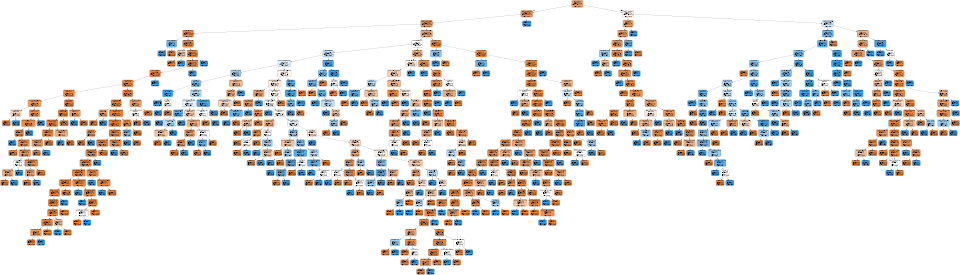

In [6]:
# default tree
cart0 = tree.DecisionTreeClassifier(criterion='gini',random_state=0)
cart0.fit(X_train, y_train)
dot_data = export_graphviz(cart0, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.set_size('"10,10"')
Image(graph.create_png())

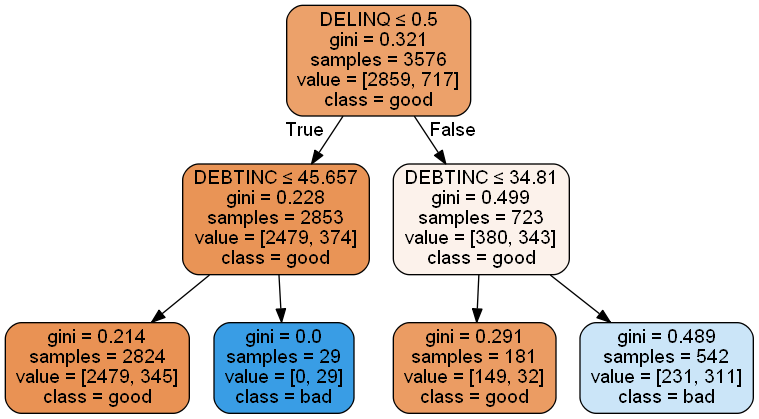

In [7]:
# simple tree
cart1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
cart1.fit(X_train, y_train)
dot_data = export_graphviz(cart1, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

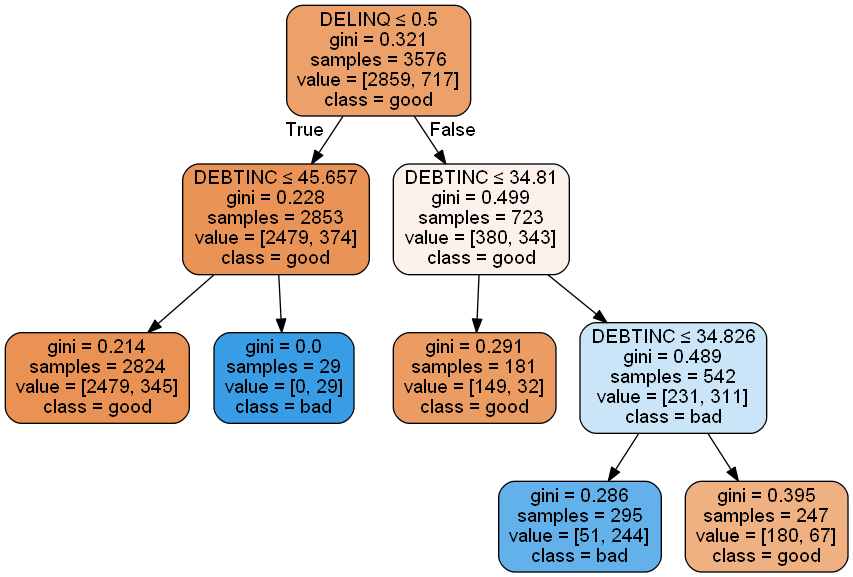

In [8]:
# longer tree2
cart2 = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.01,min_samples_split=20,random_state=0)
cart2.fit(X_train, y_train)
dot_data = export_graphviz(cart2, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

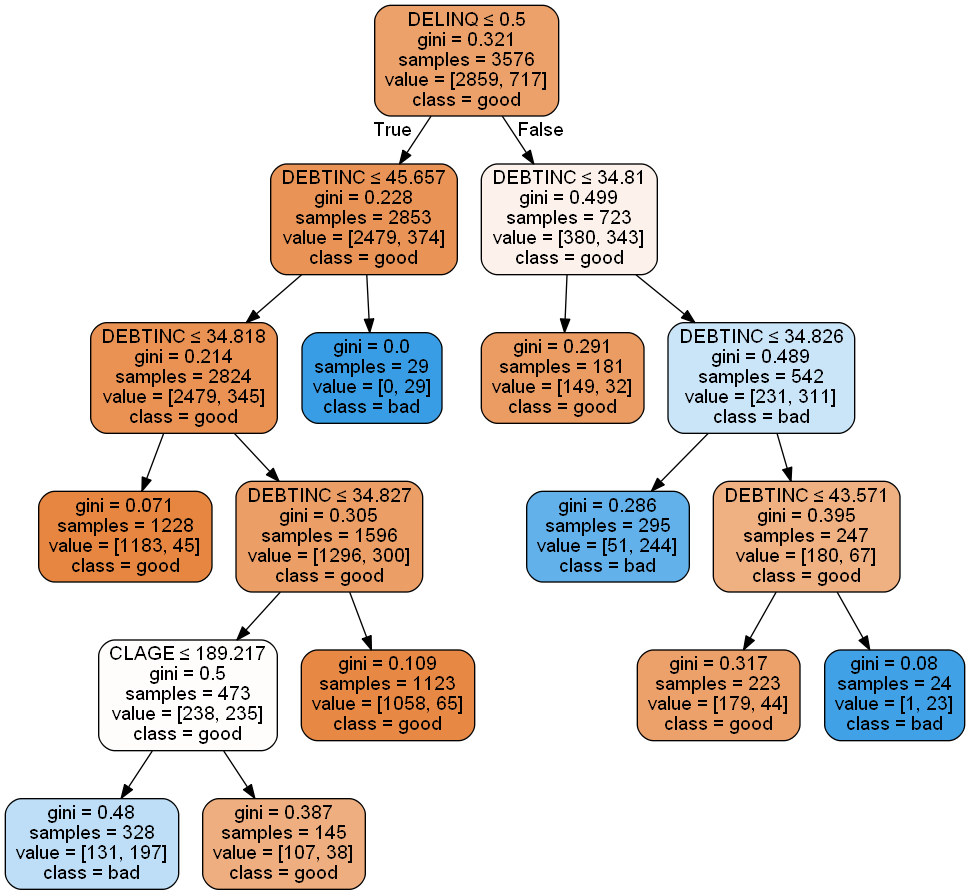

In [9]:
# longer tree3
cart3 = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.005,min_samples_split=20,random_state=0)
cart3.fit(X_train, y_train)
dot_data = export_graphviz(cart3, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

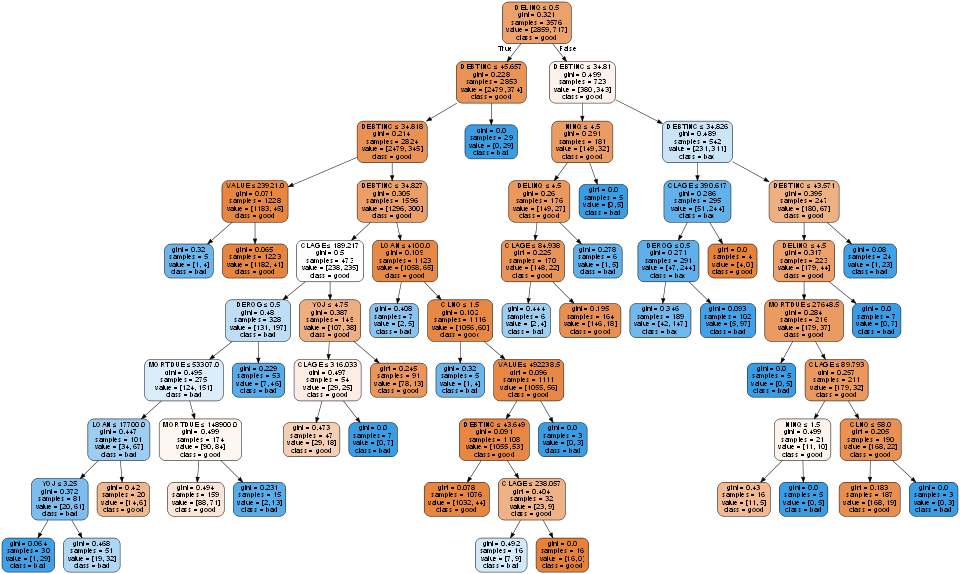

In [10]:
# longer tree4
cart4 = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.001,min_samples_split=20,random_state=0)
cart4.fit(X_train, y_train)
dot_data = export_graphviz(cart4, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,10"')
Image(graph.create_png())

In [11]:
##############################
# Accuracy comparison of several trees
y_prob1 = cart1.predict_proba(X_test)[:,1]
y_prob2 = cart2.predict_proba(X_test)[:,1]
y_prob3 = cart3.predict_proba(X_test)[:,1]
y_prob4 = cart4.predict_proba(X_test)[:,1]
y_prob0 = cart0.predict_proba(X_test)[:,1]

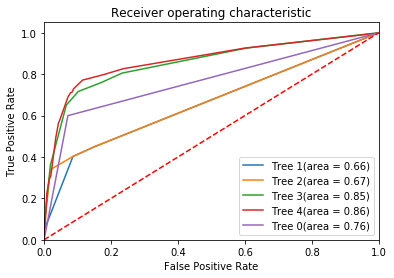

In [12]:
##############################
# ROC Curve #
roc_auc = roc_auc_score(y_test, y_prob1 )
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
roc_auc2 = roc_auc_score(y_test, y_prob2 )
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2)
roc_auc3 = roc_auc_score(y_test, y_prob3 )
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob3)
roc_auc4 = roc_auc_score(y_test, y_prob4 )
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob4)
roc_auc0 = roc_auc_score(y_test, y_prob0 )
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_prob0)
plt.figure()
plt.plot(fpr, tpr, label='Tree 1(area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='Tree 2(area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Tree 3(area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Tree 4(area = %0.2f)' % roc_auc4)
plt.plot(fpr0, tpr0, label='Tree 0(area = %0.2f)' % roc_auc0)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Mean accuracy score: 0.896


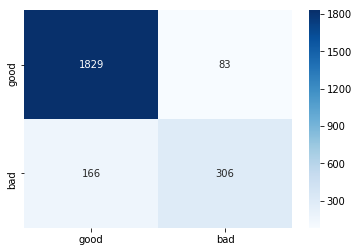

In [13]:
##############################
# Bagging
bagging = RandomForestClassifier(n_estimators=100, max_features=None, random_state=1234)
bagging.fit(X_train, y_train)
# Accuracy
bagging_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, bagging_pred)
print(f'Mean accuracy score: {accuracy:.3}')
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, bagging_pred), columns=yname, index=yname)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# Prediction probability
y_prob_bag = bagging.predict_proba(X_test)[:,1]
roc_auc_bag = roc_auc_score(y_test, y_prob_bag )
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, y_prob_bag)

Mean accuracy score: 0.908


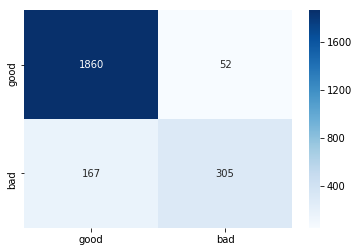

In [14]:
##############################
# Random Forest 1
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True, random_state=1234)
rf.fit(X_train, y_train)
# Accuracy
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print(f'Mean accuracy score: {accuracy:.3}')
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, rf_pred), columns=yname, index=yname)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
y_prob_rf = rf.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf )
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

Mean accuracy score: 0.908


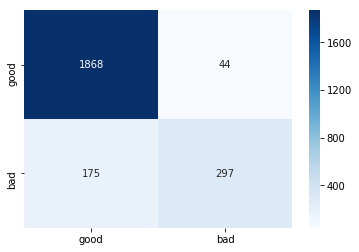

In [15]:
##############################
# Random Forest 2
rf1 = RandomForestClassifier(n_estimators=100, max_features=2, oob_score=True, random_state=1234)
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)
accuracy = accuracy_score(y_test, rf1_pred)
print(f'Mean accuracy score: {accuracy:.3}')
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, rf1_pred), columns=yname, index=yname)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
y_prob_rf1 = rf1.predict_proba(X_test)[:,1]
roc_auc_rf1 = roc_auc_score(y_test, y_prob_rf1 )
fpr_rf1, tpr_rf1, thresholds_rf1 = roc_curve(y_test, y_prob_rf1)

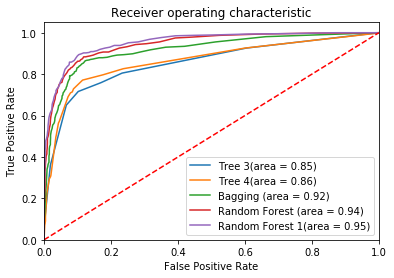

In [16]:
##############################
# ROC Curve #
plt.figure()
plt.plot(fpr3, tpr3, label='Tree 3(area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Tree 4(area = %0.2f)' % roc_auc4)
plt.plot(fpr_bag, tpr_bag, label='Bagging (area = %0.2f)' % roc_auc_bag)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_rf1, tpr_rf1, label='Random Forest 1(area = %0.2f)' % roc_auc_rf1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

LOAN = 0.10354216874117343
MORTDUE = 0.0919849693907363
VALUE = 0.10368419693753772
YOJ = 0.06885854052439579
DEROG = 0.0612204426794415
DELINQ = 0.11710553168482069
CLAGE = 0.10711571078266559
NINQ = 0.0476028370509734
CLNO = 0.08751919324820463
DEBTINC = 0.211366408960051


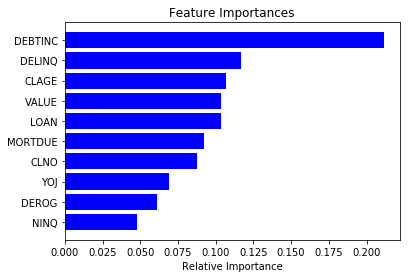

In [17]:
##############################
# Get numerical feature importances
importances = rf1.feature_importances_
for name, importance in zip(Xname, importances): print(name, "=", importance)
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),X_train.columns[indices])
plt.xlabel('Relative Importance')
plt.show()